In [1]:
import os
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import extract_wrong_ratio, select_wrong_case_topN

In [2]:
results_path = glob('./saved_model/*/exp_results_test.csv')

In [3]:
results_dict = {}

for i, path in enumerate(results_path):
    modelname = os.path.basename(os.path.dirname(path))
    results_dict[modelname] = pd.read_csv(path)

## 낚시(자동) / 낚시(직접) / 비낚시

In [4]:
for i, (modelname, df) in enumerate(results_dict.items()):
    
    wrong_ratio_df = extract_wrong_ratio(df)
    wrong_ratio_df.rename(columns={'wrong / total (%)':f'{modelname} wrong / total (%)'}, inplace=True)
    
    if i == 0:
        wrong_ratio_results = wrong_ratio_df
    else:
        wrong_ratio_results = pd.merge(
            wrong_ratio_results,
            wrong_ratio_df,
            on='category',
            how='inner'
        )

In [5]:
wrong_ratio_results

,category,HAN_w_freeze_w2e wrong / total (%),FNDNet_w_freeze_w2e wrong / total (%),BTS wrong / total (%)
0,NonClickbait_Auto,701 / 5052 (13.88%),1279 / 5052 (25.32%),109 / 5052 (2.16%)
1,Clickbait_Auto,793 / 3835 (20.68%),1496 / 3835 (39.01%),22 / 3835 (0.57%)
2,Clickbait_Direct,205 / 1187 (17.27%),279 / 1187 (23.50%),151 / 1187 (12.72%)


## Wrong case Top N

In [6]:
n = 10
cat = 'Clickbait_Auto'

def select_wrong_case_topN_per_model(resuls_dict, cat, n):
    wrong_case_topN_results = pd.DataFrame()
    for i, (modelname, df) in enumerate(results_dict.items()):

        wrong_case_topN = select_wrong_case_topN(df, cat=cat, n=n)
        wrong_case_topN.rename(columns={'outputs':f'{modelname} outputs'}, inplace=True)
        wrong_case_topN.index = range(len(wrong_case_topN))

        wrong_case_topN_results = pd.concat([
            wrong_case_topN_results,
            wrong_case_topN
        ],axis=1)
    
    return wrong_case_topN_results

In [7]:
select_wrong_case_topN_per_model(results_dict, cat='Clickbait_Auto',n=10)

,filename,HAN_w_freeze_w2e outputs,filename,FNDNet_w_freeze_w2e outputs,filename,BTS outputs
0,Clickbait_Auto/GB/GB_M11_042879_L.json,0.999950,Clickbait_Auto/ET/ET_M03_031744_L.json,0.999094,Clickbait_Auto/LC/LC_M03_089433_L.json,0.998504
1,Clickbait_Auto/SO/SO_M01_137882_L.json,0.999903,Clickbait_Auto/ET/ET_M03_032626_L.json,0.997968,Clickbait_Auto/LC/LC_M03_089509_L.json,0.998372
2,Clickbait_Auto/ET/ET_M03_032643_L.json,0.999889,Clickbait_Auto/GB/GB_M08_063419_L.json,0.997217,Clickbait_Auto/SO/SO_M01_137937_L.json,0.997570
3,Clickbait_Auto/LC/LC_M03_089797_L.json,0.999879,Clickbait_Auto/GB/GB_M08_063712_L.json,0.997149,Clickbait_Auto/PO/PO_M01_110663_L.json,0.997315
4,Clickbait_Auto/ET/ET_M03_031724_L.json,0.999866,Clickbait_Auto/GB/GB_M11_041395_L.json,0.997147,Clickbait_Auto/GB/GB_M11_042235_L.json,0.996142
5,Clickbait_Auto/IS/IS_M10_080351_L.json,0.999840,Clickbait_Auto/EC/EC_M02_000054_L.json,0.996920,Clickbait_Auto/LC/LC_M03_089644_L.json,0.995980
6,Clickbait_Auto/IS/IS_M10_078047_L.json,0.999777,Clickbait_Auto/PO/PO_M01_110522_L.json,0.996838,Clickbait_Auto/ET/ET_M03_032285_L.json,0.992394
7,Clickbait_Auto/IS/IS_M10_078801_L.json,0.999744,Clickbait_Auto/PO/PO_M01_110456_L.json,0.996806,Clickbait_Auto/GB/GB_M11_041143_L.json,0.992244
8,Clickbait_Auto/SO/SO_M01_134931_L.json,0.999736,Clickbait_Auto/LC/LC_M03_089722_L.json,0.996762,Clickbait_Auto/PO/PO_M01_110964_L.json,0.991891
9,Clickbait_Auto/LC/LC_M03_089808_L.json,0.999690,Clickbait_Auto/GB/GB_M11_042122_L.json,0.996743,Clickbait_Auto/IS/IS_M10_080097_L.json,0.991227


In [8]:
select_wrong_case_topN_per_model(results_dict, cat='Clickbait_Direct',n=10)

,filename,HAN_w_freeze_w2e outputs,filename,FNDNet_w_freeze_w2e outputs,filename,BTS outputs
0,Clickbait_Direct/SO/SO_M07_209441_L.json,0.999974,Clickbait_Direct/SO/SO_M07_209441_L.json,0.999554,Clickbait_Direct/SO/SO_M01_209223_L.json,0.998859
1,Clickbait_Direct/EC/EC_M04_156909_L.json,0.999942,Clickbait_Direct/SO/SO_M07_222405_L.json,0.998789,Clickbait_Direct/ET/ET_M13_170012_L.json,0.998752
2,Clickbait_Direct/EC/EC_M02_158106_L.json,0.999833,Clickbait_Direct/SO/SO_M07_222455_L.json,0.998754,Clickbait_Direct/EC/EC_M05_161261_L.json,0.998743
3,Clickbait_Direct/SO/SO_M01_209294_L.json,0.999729,Clickbait_Direct/SO/SO_M07_210926_L.json,0.998390,Clickbait_Direct/EC/EC_M02_161460_L.json,0.998596
4,Clickbait_Direct/EC/EC_M05_161329_L.json,0.999672,Clickbait_Direct/SO/SO_M07_222421_L.json,0.997996,Clickbait_Direct/ET/ET_M13_170234_L.json,0.998576
5,Clickbait_Direct/EC/EC_M05_157165_L.json,0.999644,Clickbait_Direct/SO/SO_M07_222497_L.json,0.997086,Clickbait_Direct/EC/EC_M05_157221_L.json,0.998553
6,Clickbait_Direct/SO/SO_M01_217961_L.json,0.999520,Clickbait_Direct/SO/SO_M07_222489_L.json,0.996791,Clickbait_Direct/EC/EC_M02_156480_L.json,0.998363
7,Clickbait_Direct/EC/EC_M02_161356_L.json,0.999518,Clickbait_Direct/EC/EC_M02_161569_L.json,0.996516,Clickbait_Direct/SO/SO_M07_209441_L.json,0.998307
8,Clickbait_Direct/SO/SO_M07_222675_L.json,0.999516,Clickbait_Direct/SO/SO_M07_209438_L.json,0.995609,Clickbait_Direct/EC/EC_M05_161267_L.json,0.998215
9,Clickbait_Direct/EC/EC_M05_162162_L.json,0.999401,Clickbait_Direct/SO/SO_M07_222532_L.json,0.994449,Clickbait_Direct/ET/ET_M13_169927_L.json,0.998191


In [9]:
select_wrong_case_topN_per_model(results_dict, cat='NonClickbait_Auto',n=10)

,filename,HAN_w_freeze_w2e outputs,filename,FNDNet_w_freeze_w2e outputs,filename,BTS outputs
0,NonClickbait_Auto/EC/EC_M02_223613_L.json,0.999997,NonClickbait_Auto/EC/EC_M02_223805_L.json,0.998744,NonClickbait_Auto/PO/PO_M01_400933_L.json,0.999574
1,NonClickbait_Auto/IS/IS_M10_349873_L.json,0.999996,NonClickbait_Auto/SO/SO_M06_419687_L.json,0.998687,NonClickbait_Auto/EC/EC_M04_224549_L.json,0.999317
2,NonClickbait_Auto/EC/EC_M02_223513_L.json,0.999983,NonClickbait_Auto/EC/EC_M05_225730_L.json,0.998475,NonClickbait_Auto/SO/SO_M01_455287_L.json,0.999300
3,NonClickbait_Auto/SO/SO_M01_456351_L.json,0.999982,NonClickbait_Auto/PO/PO_M01_403185_L.json,0.998418,NonClickbait_Auto/PO/PO_M01_401210_L.json,0.999180
4,NonClickbait_Auto/EC/EC_M02_223011_L.json,0.999976,NonClickbait_Auto/EC/EC_M05_225812_L.json,0.998293,NonClickbait_Auto/PO/PO_M01_403552_L.json,0.999110
5,NonClickbait_Auto/EC/EC_M02_222762_L.json,0.999970,NonClickbait_Auto/EC/EC_M02_223868_L.json,0.998140,NonClickbait_Auto/PO/PO_M01_402358_L.json,0.998785
6,NonClickbait_Auto/EC/EC_M02_224273_L.json,0.999964,NonClickbait_Auto/SO/SO_M02_417990_L.json,0.997982,NonClickbait_Auto/SO/SO_M01_455591_L.json,0.998673
7,NonClickbait_Auto/SO/SO_M01_455473_L.json,0.999948,NonClickbait_Auto/IS/IS_M10_348780_L.json,0.997926,NonClickbait_Auto/GB/GB_M08_298367_L.json,0.998651
8,NonClickbait_Auto/EC/EC_M02_223463_L.json,0.999947,NonClickbait_Auto/EC/EC_M05_225875_L.json,0.997886,NonClickbait_Auto/EC/EC_M02_223790_L.json,0.998193
9,NonClickbait_Auto/LC/LC_M03_371523_L.json,0.999917,NonClickbait_Auto/PO/PO_M01_403237_L.json,0.997711,NonClickbait_Auto/EC/EC_M02_223767_L.json,0.997474


## Distribution

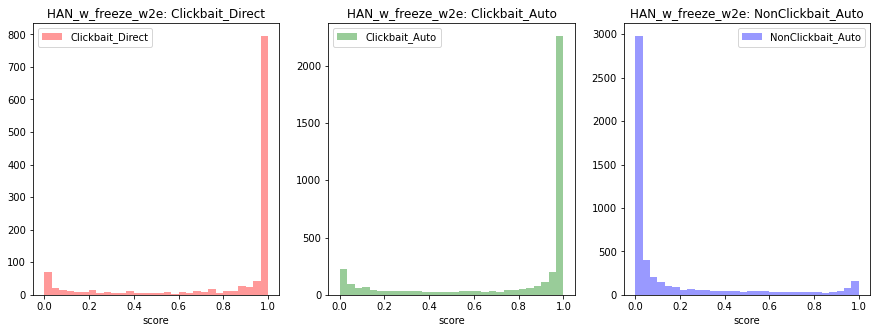

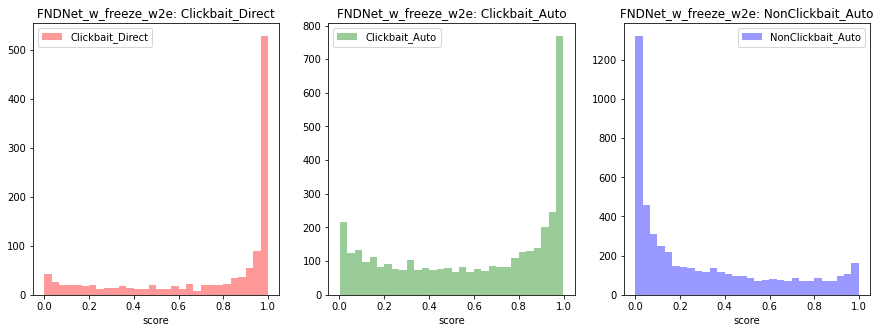

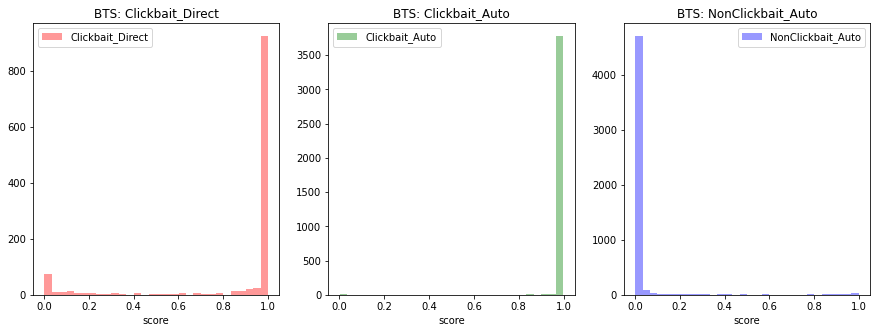

In [15]:
for modelname, df in results_dict.items():
    # extract category: Clickbait_Auto, Clickbait_Direct, NoneClickbait_Auto
    df['category'] = df['filename'].apply(lambda x: x.split('/')[0])

    color = ['r','g','b']

    fig, ax = plt.subplots(1,3,figsize=(15,5))
    for i, cat in enumerate(['Clickbait_Direct','Clickbait_Auto','NonClickbait_Auto']):
        sns.distplot(
            df[df.category == cat]['outputs'].apply(lambda x: eval(x)[1]), 
            label = cat, 
            kde   = False, 
            bins  = 30,
            color = color[i],
            ax    = ax[i]
        )

        ax[i].legend()
        ax[i].set_xlabel('score')
        ax[i].set_title(f'{modelname}: {cat}')